# TP3: Bases de données, analyse et fouille

Ce troisième travail pratique vise à vous faire manipuler, explorer et interpréter des ensembles de données en transports. Vous êtes libres d’utiliser différents outils tels que
* des systèmes de gestion de base de données relationnel (SGBDR comme SQLite, PostgreSQL, Microsoft Access, etc.) ;
* des langages de programmation pour manipuler les données et les visualiser (Matlab, Python, R, etc.) ;
* des outils économétriques (Gretl, Tanagra, R, Python/StatsModels) ;
* des outils de fouille de données (Tanagra,Weka).

## 1. Jeu de données
Les données utilisées sont les temps de parcours collectés par la Ville de Montréal à l’aide de capteurs Bluetooth disponible sur le portail des données ouvertes. Les données sont collectées pour des paires origine-destination pré-définies, décrites dans le fichier des segments routiers de collecte des temps de parcours. Les données de temps de parcours disponibles couvrent la période du 1er janvier 2016 au 28 février 2017. Les attributs des deux fichiers de données sont décrits sur leurs pages respectives.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
seg_routier = pd.read_csv('./donnees/bornes.csv', sep=',', index_col = 3)
trips16 = pd.read_csv('./donnees/trips2016.csv', sep=',', index_col = 0)

## 2. Mandats
### 2.1 Modèle de données
Après analyse des fichiers des segments routiers et des temps de parcours, proposer un modèle de données relationnel pour ces données respectant les trois formes normales (retirer les données redondantes). Indiquer les clefs primaires, externes et les types de données des attributs.

Il n’est pas obligé d’utiliser ce modèle dans la suite des travaux.

In [63]:
seg_routier.head()

,IdLink,channel_name,active,SrcDetectorId,SrcLatitude,SrcLongitude,DestDetectorId,DestLatitude,DestLongitude,LinkName,RouteDirectionName,SrcChannelId,DestChannelId,LineDistance_m,last_poll_time
LinkID,,,,,,,,,,,,,,,
LCh_10-16,1,Saint-Michel-Industriel,1,10,"45,5760283333333","-73,6364616666667",16,"45,564785","-73,6449433333333",Charland:Saint-Michel a Papineau,O,11,17,1410,2019-07-02 18:44:59
LCh_16-10,2,Papineau-charland,1,16,"45,564785","-73,6449433333333",10,"45,5760283333333","-73,6364616666667",Charland:Papineau a Saint-Michel,N,17,11,1414,2019-07-02 18:44:58
LHB_15-20,3,Papineau-Henri-Bourassa,1,15,"45,5702683333333","-73,6588066666667",20,"45,555365","-73,6683933333333",Henri-Bourassa:Papineau a Lajeunesse,O,16,21,1818,2019-07-02 18:44:57
LHB_20-15,4,Henri-Bourassa-Lajeunesse,1,20,"45,555365","-73,6683933333333",15,"45,5702683333333","-73,6588066666667",Henri-Bourassa:Lajeunesse a Papineau,N,21,16,1818,2019-02-15 13:56:37
LHB_20-21,5,Henri-Bourassa-Lajeunesse,1,20,"45,555365","-73,6683933333333",21,"45,5349866666667","-73,6807116666667",Henri_Bourassa:Lajeunesse a Bourassa-Acadie,O,21,22,2460,2019-02-15 13:56:37


In [61]:
trips16.head()

,SrcDetectorId,DestDetectorId,PathDistance_m,TripStart_dt,TripEnd_dt,Speed_kmh,TravelTime_s
LinkId,,,,,,,
LCC_35-34,35,34,448,2016-01-25 15:40:49,2016-01-25 15:41:16,"59,7333333",27
LCC_35-34,35,34,448,2016-01-25 15:40:52,2016-01-25 15:41:19,"59,7333333",27
LSh_05-06,5,6,403,2016-01-25 15:40:53,2016-01-25 15:41:21,"51,8142857",28
LSh_02-01,2,1,1192,2016-01-25 15:40:19,2016-01-25 15:41:41,"52,3317073",82
LSJ_41-39,41,39,298,2016-01-25 15:40:16,2016-01-25 15:41:45,"12,0539326",89


## 2.2 Analyse descriptive des temps de parcours
Pour cette première partie, il faut sélectionner deux segments routiers à étudier (le même segment dans les deux directions de déplacement, de A à B et de B vers A) de longueur supérieure à 1500 m. Indiquer clairement les deux segments sélectionnés.

Analyse des segments routiers ayant une longueur supérieure à 1500 m:

In [64]:
seg_routier[seg_routier.LineDistance_m>1500]

,IdLink,channel_name,active,SrcDetectorId,SrcLatitude,SrcLongitude,DestDetectorId,DestLatitude,DestLongitude,LinkName,RouteDirectionName,SrcChannelId,DestChannelId,LineDistance_m,last_poll_time
LinkID,,,,,,,,,,,,,,,
LHB_15-20,3,Papineau-Henri-Bourassa,1,15,"45,5702683333333","-73,6588066666667",20,"45,555365","-73,6683933333333",Henri-Bourassa:Papineau a Lajeunesse,O,16,21,1818,2019-07-02 18:44:57
LHB_20-15,4,Henri-Bourassa-Lajeunesse,1,20,"45,555365","-73,6683933333333",15,"45,5702683333333","-73,6588066666667",Henri-Bourassa:Lajeunesse a Papineau,N,21,16,1818,2019-02-15 13:56:37
LHB_20-21,5,Henri-Bourassa-Lajeunesse,1,20,"45,555365","-73,6683933333333",21,"45,5349866666667","-73,6807116666667",Henri_Bourassa:Lajeunesse a Bourassa-Acadie,O,21,22,2460,2019-02-15 13:56:37
LHB_21-20,6,Henri-Bourassa-Acadie,1,21,"45,5349866666667","-73,6807116666667",20,"45,555365","-73,6683933333333",Henri_Bourassa:Acadie a Bourassa-Lajeunesse,E,22,21,2460,2019-07-02 18:45:02
LPa_16-17,11,Papineau-charland,1,16,"45,564785","-73,6449433333333",17,"45,5564283333333","-73,626345",Papineau:Charland a Barnabe-Larocque,S,17,18,1707,2019-07-02 18:44:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTh_1Q-1O,360,Cavendish-Poirier,1,1Q,"45,50528","-73,71136",1O,"45,50951","-73,6975",Thimens : Poirier à Alexis-Nihon,E,139,137,1627,2019-07-02 18:44:56
LTh_1O-1Q,361,Alexis-Nihon-Thimens,1,1O,"45,50951","-73,6975",1Q,"45,50528","-73,71136",Thimens : Alexis-Nihon à Poirier,O,137,139,1564,2019-07-02 18:44:58
LND_1E-1M,367,Notre-Dame-Letourneux,1,1E,"45,55003","-73,53208",1M,"45,53643","-73,54156","Notre-Dame : Letourneux à Alphonse-D,-Roy",O,125,134,1683,2019-07-02 18:44:53


Les deux segments choisis:

In [65]:
#A a B: Henri-Bourrassa de Papineau a Lajeunesse
seg_routier.iloc[2]

IdLink                                                   3
channel_name                       Papineau-Henri-Bourassa
active                                                   1
SrcDetectorId                                           15
SrcLatitude                               45,5702683333333
SrcLongitude                             -73,6588066666667
DestDetectorId                                          20
DestLatitude                                     45,555365
DestLongitude                            -73,6683933333333
LinkName              Henri-Bourassa:Papineau a Lajeunesse
RouteDirectionName                                       O
SrcChannelId                                            16
DestChannelId                                           21
LineDistance_m                                        1818
last_poll_time                         2019-07-02 18:44:57
Name: LHB_15-20, dtype: object

In [66]:
#B a A: Henri-Bourrassa de Lajeunesse a Papineau
seg_routier.iloc[3]

IdLink                                                   4
channel_name                     Henri-Bourassa-Lajeunesse
active                                                   1
SrcDetectorId                                           20
SrcLatitude                                      45,555365
SrcLongitude                             -73,6683933333333
DestDetectorId                                          15
DestLatitude                              45,5702683333333
DestLongitude                            -73,6588066666667
LinkName              Henri-Bourassa:Lajeunesse a Papineau
RouteDirectionName                                       N
SrcChannelId                                            21
DestChannelId                                           16
LineDistance_m                                        1818
last_poll_time                         2019-02-15 13:56:37
Name: LHB_20-15, dtype: object

### 2.2.1 Étude de la distribution des temps de parcours
Décrire la distribution des temps de parcours dans une direction, par des statistiques descriptives et des figures. Proposer une méthode pour filtrer les temps de parcours les plus longs si nécessaire. Une fois les données filtrées, faire un test d’adéquation à la loi
normale (ou autre loi théorique plus adaptée).

Le cas échéant, la méthode de filtrage sera appliquée à toutes les données utilisées par
la suite.

In [70]:
# de A a B
trips16.loc['LHB_15-20']['TravelTime_s'].describe()

count    168840.000000
mean        354.534559
std         298.893108
min          92.000000
25%         208.000000
50%         254.000000
75%         339.000000
max        1800.000000
Name: TravelTime_s, dtype: float64

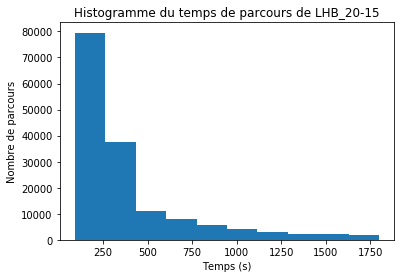

In [83]:
a = trips16.loc['LHB_20-15']['TravelTime_s'].to_numpy()

fig,ax = plt.subplots(1,1)
ax.hist(a)
ax.set_title("Histogramme du temps de parcours de LHB_20-15")
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Nombre de parcours')
plt.show()

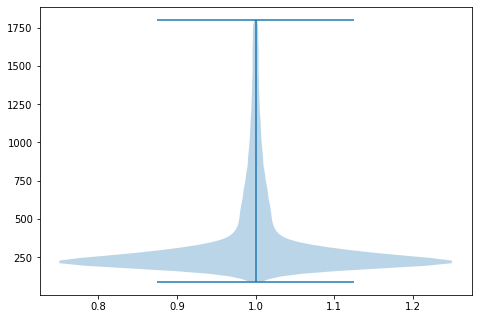

In [90]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(a)
plt.show()

In [105]:
temps_filtres = a[a<500]
temps_filtres

array([212, 239, 290, ..., 205, 245, 293], dtype=int64)

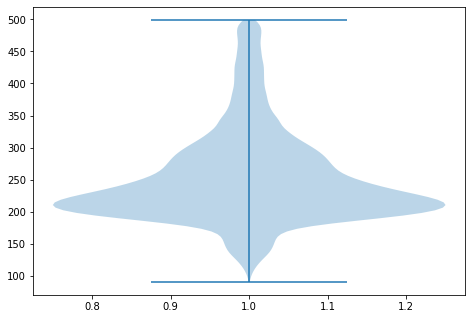

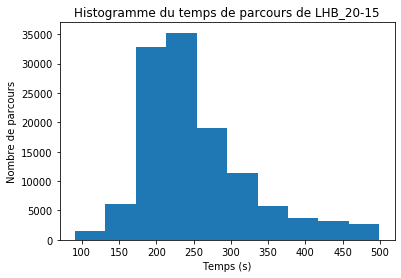

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(temps_filtres)
fig,ax = plt.subplots(1,1)

ax.hist(temps_filtres)
ax.set_title("Histogramme du temps de parcours de LHB_20-15")
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Nombre de parcours')
plt.show()

### 2.2.2 Analyse des détections et temps de parcours en fonction du temps
En choisissant une direction de déplacement, décrire la répartition temporelle des nombres d’observation et des temps de parcours, selon les mois, jours de la semaine et heures de la journée. Justifier la statistique utilisée pour représenter les temps de parcours. Faire au moins six graphiques présentant les informations suivantes et
commenter :
1. Nombre d’observations et temps de parcours en fonction des mois ;
2. Nombre d’observations et temps de parcours par jour de la semaine ;
3. Nombre d’observations et temps de parcours par type de jour (semaine/fin de semaine) et heure de la journée.

Étudier la corrélation des temps de parcours pour les deux directions à l’échelle de l’heure (inclure une figure).

In [113]:
trips16.loc['LHB_20-15']['TripStart_dt']

LinkId
LHB_20-15    2016-01-25 15:45:28
LHB_20-15    2016-01-25 15:46:01
LHB_20-15    2016-01-25 15:45:25
LHB_20-15    2016-01-25 15:46:00
LHB_20-15    2016-01-25 16:03:19
                    ...         
LHB_20-15    2016-01-25 20:15:29
LHB_20-15    2016-01-25 20:05:41
LHB_20-15    2016-01-25 20:16:48
LHB_20-15    2016-01-25 20:19:04
LHB_20-15    2016-01-25 20:23:36
Name: TripStart_dt, Length: 154958, dtype: object

## 2.3 Segmentation des patrons journaliers des temps de parcours
Choisir un segment routier et faire une segmentation des patrons journaliers des temps de parcours en créant des vecteurs des temps de parcours moyen pour chaque heure de chaque journée (chaque jour est représenté par un vecteur de taille 24). Choisir le nombre de groupes par essai-erreur et présenter les caractéristiques, en particulier temporelles, de chaque groupe trouvé avec les justifications appropriées (en particulier des graphiques). Décrire brièvement les traitements appliqués aux données, en particulier les conversions d’attributs.

## 2.4 Étude des facteurs associés aux conditions de déplacement
Choisir cinq segments routiers dans des quartiers différents de Montréal et créer une variable binaire décrivant les conditions de déplacement à chaque heure de chaque journée, par exemple à l’aide de la limite de vitesse de chaque segment. Enrichir les données horaires des conditions météorologiques (voir fichiers sur moodle) et de
caractéristiques pertinentes des segments routiers comme le nombre de voies, son orientation (points cardinaux), le nombre de carrefours, la distance au centre-ville, etc.

Étudier les facteurs temporels, météorologiques et les caractéristiques des segments associés aux conditions de déplacement sur l’ensemble des segments choisis à l’aide d’un arbre de décision.

2.4 (fais un modèle de régression linéaire entre la vitesse normalisée par la limite de vitesse et des attributs des déplacements (mois, heure de la journée) et du segment (point cardinal du fichier seg_routier?))